### BoomBikes - Bike Sharing  

In [178]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [179]:
boom = pd.read_csv('Bike Sharing Dataset_Assignment.csv')

In [180]:
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [181]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [182]:
boom.shape

(730, 16)

In [183]:
### first column 'instant' is an index number, which we do not use in our model building process so we drop it

boom = boom.drop('instant',axis = 1)

In [184]:
boom = boom.drop(columns = ['casual','registered'],axis = 1)

categorical columns vs target variable - Box plots to study the distribution of data with target variable
----------------------------------------------------------------------------------------------------------


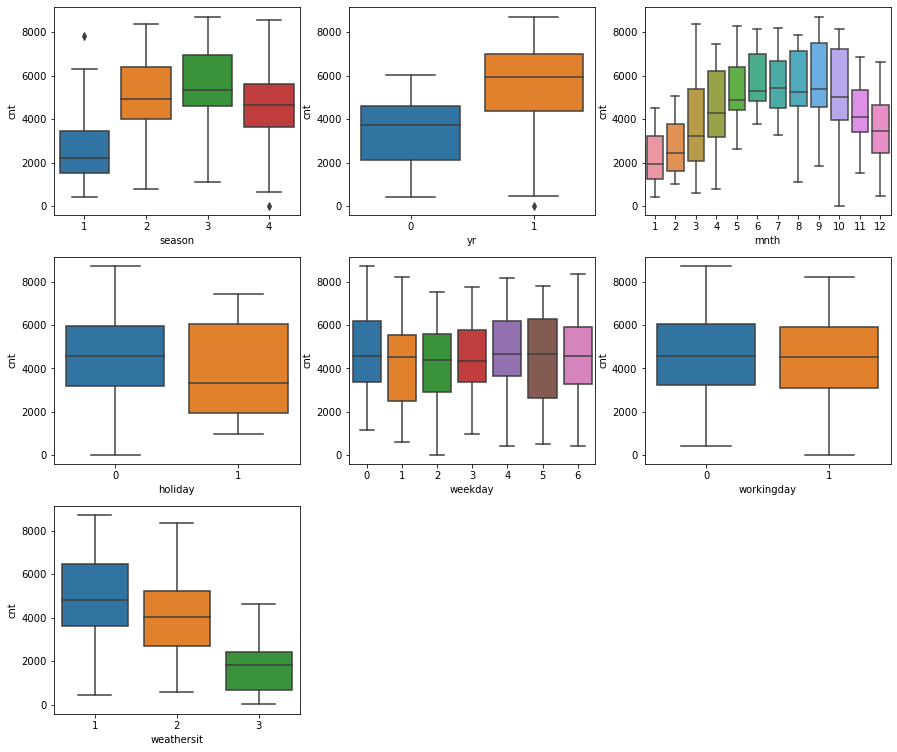

In [185]:
print('categorical columns vs target variable - Box plots to study the distribution of data with target variable')
print('----------------------------------------------------------------------------------------------------------')
plt.figure(figsize = [15,13])
plt.subplot(3,3,1)
sns.boxplot(data = boom, x = 'season', y = 'cnt')
plt.subplot(3,3,2)
sns.boxplot(data = boom, x = 'yr', y = 'cnt')
plt.subplot(3,3,3)
sns.boxplot(data = boom, x = 'mnth', y = 'cnt')
plt.subplot(3,3,4)
sns.boxplot(data = boom, x = 'holiday', y = 'cnt')
plt.subplot(3,3,5)
sns.boxplot(data = boom, x = 'weekday', y = 'cnt')
plt.subplot(3,3,6)
sns.boxplot(data = boom, x = 'workingday', y = 'cnt')
plt.subplot(3,3,7)
sns.boxplot(data = boom, x = 'weathersit', y = 'cnt')
plt.show()

In [186]:
# we convert the categorical columns defined in our dataset as int64 to object type
# Reason-since these variables are categorical columns encoded in numbers we convert them from int64 to object datatype
boom.season = boom.season.astype('object')
boom.yr = boom.yr.astype('object')
boom.mnth = boom.mnth.astype('object')
boom.holiday = boom.holiday.astype('object')
boom.weekday = boom.workingday.astype('object')
boom.workingday = boom.workingday.astype('object')
boom.weathersit = boom.weathersit.astype('object')

In [187]:
cat_var = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
cat_var

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

## Univariate Analysis for categorical features -- season , yr

In [91]:
boom.cnt[boom['season']==1].describe()

count     180.000000
mean     2608.411111
std      1402.659942
min       431.000000
25%      1536.000000
50%      2222.500000
75%      3463.750000
max      7836.000000
Name: cnt, dtype: float64

In [92]:
boom.cnt[boom['season']==2].describe()

count     184.000000
mean     4992.331522
std      1695.977235
min       795.000000
25%      4003.000000
50%      4941.500000
75%      6377.000000
max      8362.000000
Name: cnt, dtype: float64

In [93]:
boom.cnt[boom['season']==3].describe()

count     188.000000
mean     5644.303191
std      1459.800381
min      1115.000000
25%      4586.500000
50%      5353.500000
75%      6929.250000
max      8714.000000
Name: cnt, dtype: float64

In [94]:
boom.cnt[boom['yr']==0].describe()

count     365.000000
mean     3405.761644
std      1378.753666
min       431.000000
25%      2132.000000
50%      3740.000000
75%      4586.000000
max      6043.000000
Name: cnt, dtype: float64

In [95]:
boom.cnt[boom['yr']==1].describe()

count     365.000000
mean     5610.252055
std      1780.183449
min        22.000000
25%      4375.000000
50%      5936.000000
75%      7013.000000
max      8714.000000
Name: cnt, dtype: float64

In [188]:
cat_col_df = boom[cat_var]

In [189]:
cat_col_df

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,1,0,1,0,1,1,2
1,1,0,1,0,1,1,2
2,1,0,1,0,1,1,1
3,1,0,1,0,1,1,1
4,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...
725,1,1,12,0,1,1,2
726,1,1,12,0,0,0,2
727,1,1,12,0,0,0,2
728,1,1,12,0,1,1,1


In [190]:
dummy_cat = pd.get_dummies(cat_col_df)

In [191]:
dummy_cat.columns

Index(['season_1', 'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_0',
       'holiday_1', 'weekday_0', 'weekday_1', 'workingday_0', 'workingday_1',
       'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [192]:
boom = pd.concat([boom , dummy_cat],axis = 1)

In [193]:
boom

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,mnth_12,holiday_0,holiday_1,weekday_0,weekday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,...,0,1,0,0,1,0,1,0,1,0
1,02-01-2018,1,0,1,0,1,1,2,14.902598,17.68695,...,0,1,0,0,1,0,1,0,1,0
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,...,0,1,0,0,1,0,1,1,0,0
3,04-01-2018,1,0,1,0,1,1,1,8.200000,10.60610,...,0,1,0,0,1,0,1,1,0,0
4,05-01-2018,1,0,1,0,1,1,1,9.305237,11.46350,...,0,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,1,1,2,10.420847,11.33210,...,1,1,0,0,1,0,1,0,1,0
726,28-12-2019,1,1,12,0,0,0,2,10.386653,12.75230,...,1,1,0,1,0,1,0,0,1,0
727,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,...,1,1,0,1,0,1,0,0,1,0
728,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,...,1,1,0,0,1,0,1,1,0,0


In [194]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

### Bivariate Analysis - Numerical Columns

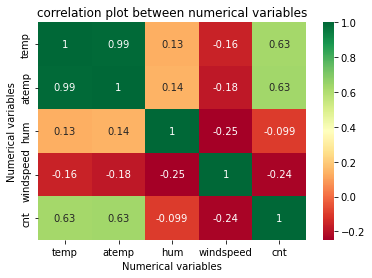

In [195]:
# heatmap to find the highest correlation between numerical variables

sns.heatmap(boom[num_vars].corr(),annot = True, cmap = 'RdYlGn')

plt.title('correlation plot between numerical variables')
plt.xlabel('Numerical variables')
plt.ylabel('Numerical variables')
plt.show()

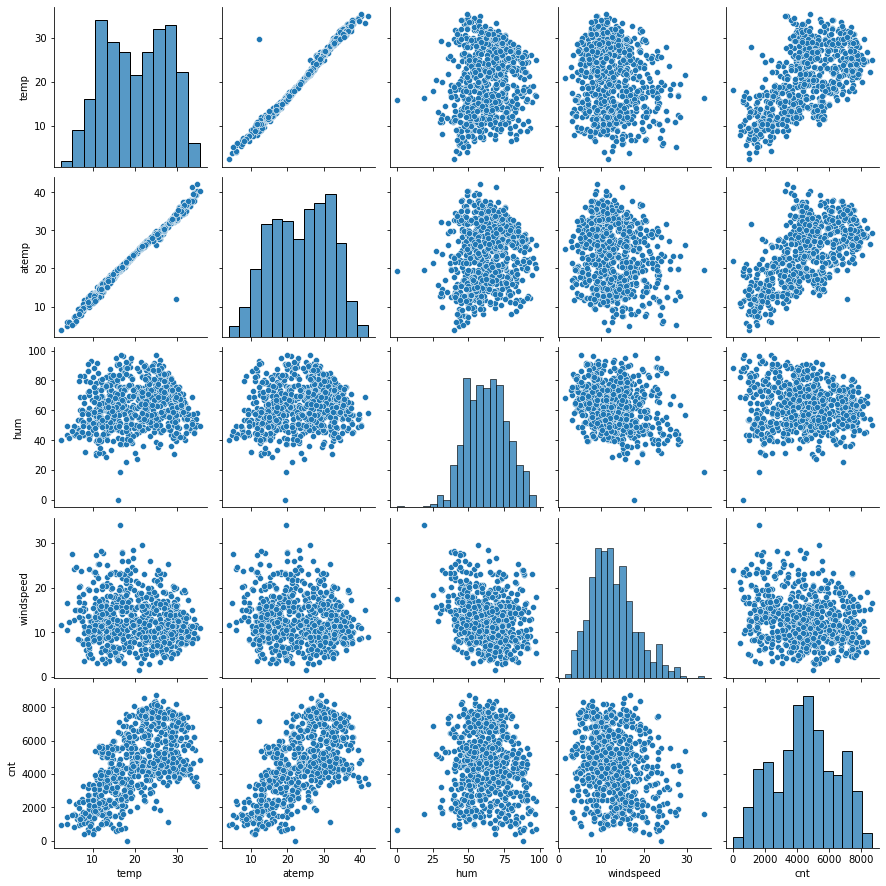

In [196]:
# pairplot between numerical variables
sns.pairplot(boom[num_vars])
plt.show()

In [197]:
# After creating the dummy variables for the categorical columns drop the actual categorical columns
boom.drop(columns = cat_var,inplace = True)

In [198]:
# drop the date column as we cannot interpret for our analysis, 
#converting the date to numerical column has no meaning so we drop it in our analysis
boom.drop('dteday',inplace = True,axis = 1)

In [199]:
boom

,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,...,mnth_12,holiday_0,holiday_1,weekday_0,weekday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,...,0,1,0,0,1,0,1,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,...,0,1,0,0,1,0,1,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,...,0,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,0,0,...,1,1,0,0,1,0,1,0,1,0
726,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,0,0,...,1,1,0,1,0,1,0,0,1,0
727,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,0,0,...,1,1,0,1,0,1,0,0,1,0
728,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,0,0,...,1,1,0,0,1,0,1,1,0,0


In [200]:
boom.describe()

,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,...,mnth_12,holiday_0,holiday_1,weekday_0,weekday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.257534,0.243836,0.500000,...,0.084932,0.971233,0.028767,0.309589,0.690411,0.309589,0.690411,0.634247,0.336986,0.028767
std,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.437576,0.429689,0.500343,...,0.278971,0.167266,0.167266,0.462641,0.462641,0.462641,0.462641,0.481971,0.473004,0.167266
min,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


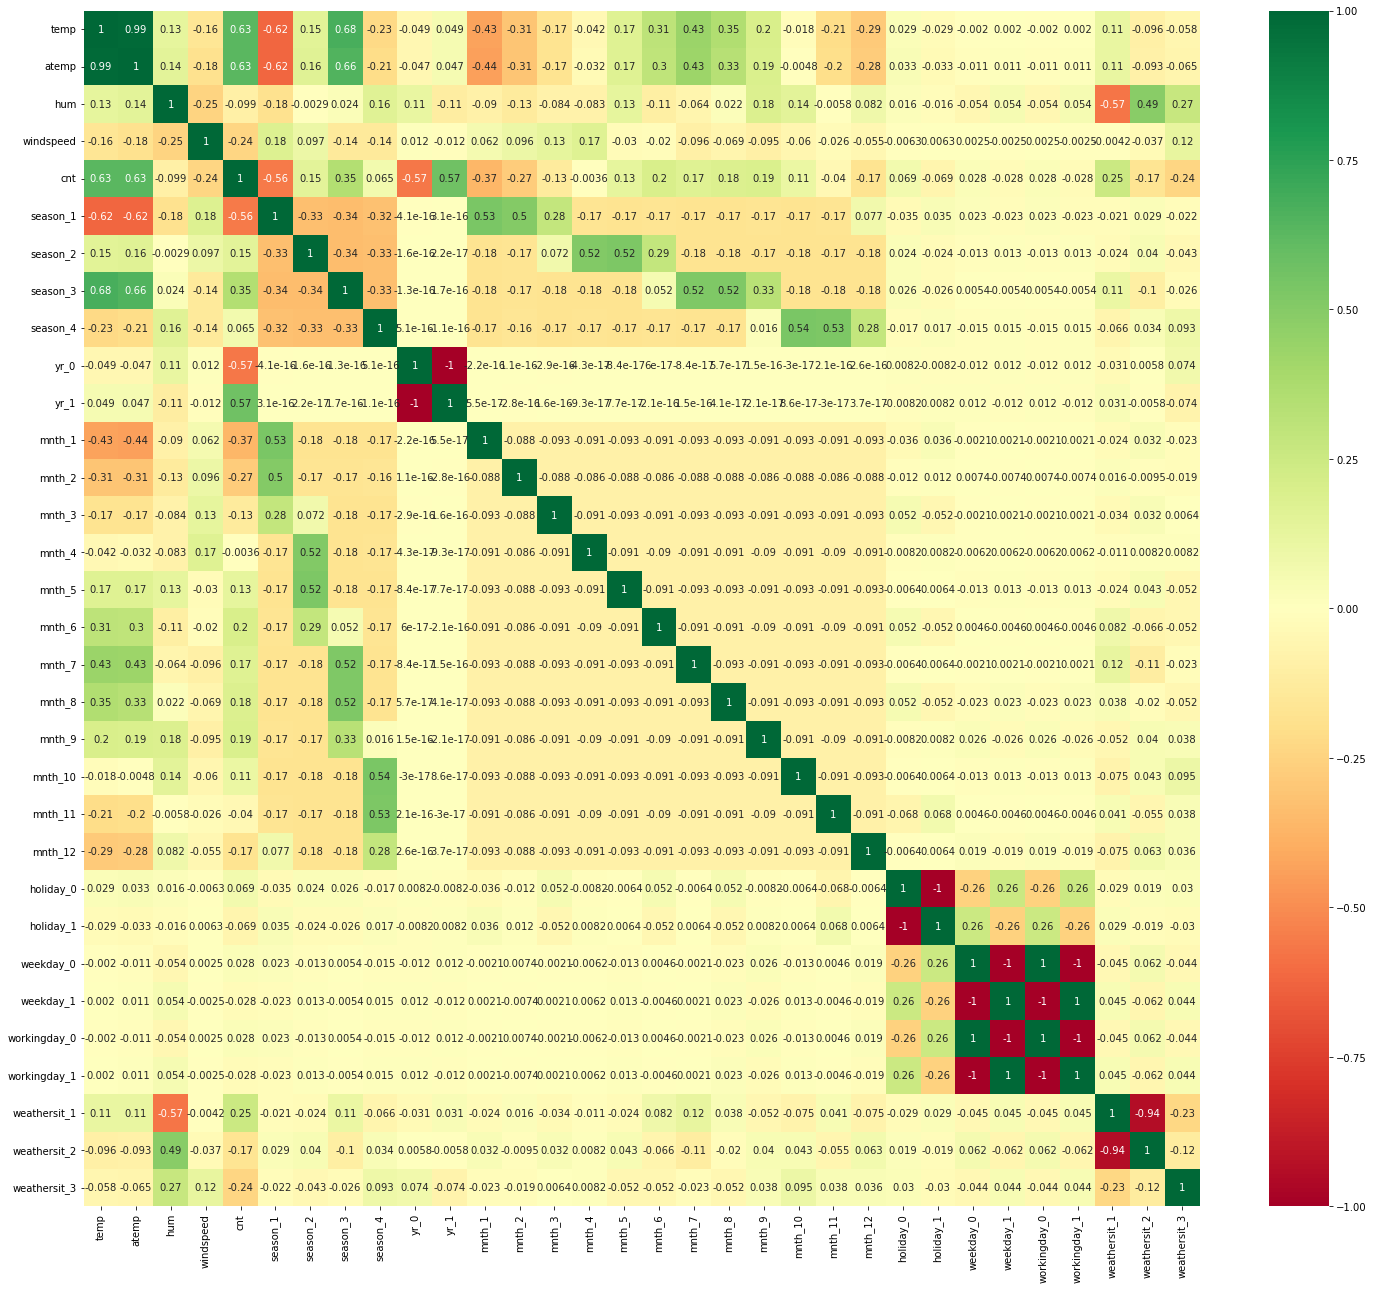

In [201]:
plt.figure(figsize = [25,22])
sns.heatmap(boom.corr(),cmap = 'RdYlGn', annot = True)
plt.show()

In [203]:
# Train Test split 
from sklearn.model_selection import train_test_split

In [204]:
train_data,test_data = train_test_split(boom,train_size = 0.7,random_state = 100)

In [205]:
train_data

,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,...,mnth_12,holiday_0,holiday_1,weekday_0,weekday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
576,29.246653,33.14480,70.4167,11.083475,7216,0,0,1,0,0,...,0,1,0,0,1,0,1,1,0,0
426,16.980847,20.67460,62.1250,10.792293,4066,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
728,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,0,0,...,1,1,0,0,1,0,1,1,0,0
482,15.443347,18.87520,48.9583,8.708325,4220,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
111,13.803347,16.09770,72.9583,14.707907,1683,0,1,0,0,1,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,30.852500,35.35440,65.9583,8.666718,7261,0,0,1,0,0,...,0,1,0,0,1,0,1,1,0,0
53,9.091299,12.28585,42.3043,6.305571,1917,1,0,0,0,1,...,0,1,0,0,1,0,1,1,0,0
350,10.591653,12.46855,56.0833,16.292189,2739,0,0,0,1,1,...,1,1,0,0,1,0,1,0,1,0
79,17.647835,20.48675,73.7391,19.348461,2077,0,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0


In [206]:
test_data

,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,...,mnth_12,holiday_0,holiday_1,weekday_0,weekday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
184,29.793347,33.27085,63.7917,5.459106,6043,0,0,1,0,1,...,0,0,1,1,0,1,0,0,1,0
535,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,0,...,0,1,0,0,1,0,1,1,0,0
299,19.270000,22.85230,81.2917,13.250121,2659,0,0,0,1,1,...,0,1,0,1,0,1,0,0,1,0
221,31.433347,34.24915,42.4167,13.417286,4780,0,0,1,0,1,...,0,1,0,0,1,0,1,1,0,0
152,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,1,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,19.509153,23.45270,73.3750,11.666643,6606,0,0,0,1,0,...,1,1,0,0,1,0,1,1,0,0
127,21.661653,25.94665,63.1667,5.000712,4333,0,1,0,0,1,...,0,1,0,0,1,0,1,1,0,0
640,26.957500,29.95665,79.3750,4.458569,7572,0,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0
72,13.333897,16.60000,49.6957,9.174042,2046,1,0,0,0,1,...,0,1,0,0,1,0,1,1,0,0


### Scaling

In [207]:
from sklearn.preprocessing import MinMaxScaler

In [208]:
scaler = MinMaxScaler()

In [209]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

In [210]:
# we will apply scaler to numerical columns of the training set and not on dummy variables
train_data[num_vars] = scaler.fit_transform(train_data[num_vars])

In [211]:
y_train_data = train_data.pop('cnt')

In [212]:
X_train_data = train_data

In [213]:
import statsmodels.api as sm

In [214]:
X_train_const = sm.add_constant(X_train_data)

In [215]:
lr = sm.OLS(y_train_data,X_train_const)

In [216]:
lr_model = lr.fit()

In [217]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     117.8
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          3.97e-182
Time:                        21:23:23   Log-Likelihood:                 519.09
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     486   BIC:                            -888.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0862      0.011      8.162      0.000       0.065       0.107
temp             0.3967      0.143      2.770      0.006       0.115       0.678
atemp            0.0552      0.139      0.397      0.692      -0.218       0.329
hum             -0.1621      0.039     -4.167      0.000      -0.239      -0.086
windspeed       -0.1845      0.027     -6.931      0.000      -0.237      -0.132
season_1        -0.0503      0.016     -3.108      0.002      -0.082      -0.019
season_2         0.0388      0.016      2.395      0.017       0.007       0.071
season_3        -0.0050      0.018     -0.275      0.784      -0.040       0.031
season_4         0.1027      0.018      5.747      0.000       0.068       0.138
yr_0            -0.0726      0.007    -11.091      0.000      -0.085      -0.060
yr_1             0.1588      0.007     23.410      0.000       0.145       0.172
mnth_1          -0.0482      0.024     -1.973      0.049      -0.096      -0.000
mnth_2          -0.0203      0.024     -0.858      0.391      -0.067       0.026
mnth_3           0.0158      0.017      0.930      0.353      -0.018       0.049
mnth_4           0.0108      0.021      0.508      0.612      -0.031       0.052
mnth_5           0.0372      0.022      1.700      0.090      -0.006       0.080
mnth_6           0.0173      0.021      0.817      0.414      -0.024       0.059
mnth_7          -0.0237      0.026     -0.928      0.354      -0.074       0.027
mnth_8           0.0361      0.024      1.516      0.130      -0.011       0.083
mnth_9           0.1007      0.020      5.160      0.000       0.062       0.139
mnth_10          0.0174      0.022      0.777      0.437      -0.027       0.061
mnth_11         -0.0266      0.023     -1.148      0.252      -0.072       0.019
mnth_12         -0.0302      0.020     -1.491      0.137      -0.070       0.010
holiday_0        0.0938      0.012      7.547      0.000       0.069       0.118
holiday_1       -0.0076      0.016     -0.471      0.638      -0.039       0.024
weekday_0        0.0479      0.006      8.541      0.000       0.037       0.059
weekday_1        0.0383      0.006      6.488      0.000       0.027       0.050
workingday_0     0.0479      0.006      8.541      0.000       0.037       0.059
workingday_1     0.0383      0.006      6.488      0.000       0.027       0.050
weathersit_1     0.1301      0.009     13.889      0.000       0.112       0.149
weathersit_2     0.0730      0.009      7.700      0.000       0.054       0.092
weathersit_3    -0.1169      0.019     -6.314      0.000      -0.153      -0.081
==============================================================================
Omnibus:                       78.805   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.687
Skew:      

In [218]:
X_train_data.drop(columns = ['season_3'],inplace = True)

In [220]:
# 2nd model after dropping casual, registered

X_train_const = sm.add_constant(X_train_data)

lr = sm.OLS(y_train_data,X_train_const)

lr_model2 = lr.fit()

lr_model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     117.8
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          3.97e-182
Time:                        21:27:27   Log-Likelihood:                 519.09
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     486   BIC:                            -888.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0847      0.013      6.727      0.000       0.060       0.110
temp             0.3967      0.143      2.770      0.006       0.115       0.678
atemp            0.0552      0.139      0.397      0.692      -0.218       0.329
hum             -0.1621      0.039     -4.167      0.000      -0.239      -0.086
windspeed       -0.1845      0.027     -6.931      0.000      -0.237      -0.132
season_1        -0.0454      0.030     -1.499      0.134      -0.105       0.014
season_2         0.0438      0.026      1.657      0.098      -0.008       0.096
season_4         0.1076      0.028      3.813      0.000       0.052       0.163
yr_0            -0.0733      0.007    -10.017      0.000      -0.088      -0.059
yr_1             0.1581      0.008     20.603      0.000       0.143       0.173
mnth_1          -0.0483      0.025     -1.968      0.050      -0.097   -8.38e-05
mnth_2          -0.0204      0.024     -0.858      0.391      -0.067       0.026
mnth_3           0.0157      0.017      0.914      0.361      -0.018       0.050
mnth_4           0.0106      0.021      0.501      0.617      -0.031       0.052
mnth_5           0.0371      0.022      1.686      0.092      -0.006       0.080
mnth_6           0.0171      0.021      0.812      0.417      -0.024       0.059
mnth_7          -0.0239      0.025     -0.941      0.347      -0.074       0.026
mnth_8           0.0359      0.024      1.528      0.127      -0.010       0.082
mnth_9           0.1006      0.019      5.217      0.000       0.063       0.139
mnth_10          0.0173      0.022      0.769      0.443      -0.027       0.061
mnth_11         -0.0267      0.023     -1.150      0.251      -0.072       0.019
mnth_12         -0.0304      0.020     -1.490      0.137      -0.070       0.010
holiday_0        0.0930      0.013      7.289      0.000       0.068       0.118
holiday_1       -0.0083      0.017     -0.502      0.616      -0.041       0.024
weekday_0        0.0472      0.007      7.183      0.000       0.034       0.060
weekday_1        0.0376      0.007      5.495      0.000       0.024       0.051
workingday_0     0.0472      0.007      7.183      0.000       0.034       0.060
workingday_1     0.0376      0.007      5.495      0.000       0.024       0.051
weathersit_1     0.1297      0.010     13.483      0.000       0.111       0.149
weathersit_2     0.0725      0.010      7.410      0.000       0.053       0.092
weathersit_3    -0.1174      0.019     -6.293      0.000      -0.154      -0.081
==============================================================================
Omnibus:                       78.805   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.687
Skew:                          -0.789   Prob(JB):                     3.21e-43
Kurtosis:    

In [223]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [224]:
vif = pd.DataFrame()

vif['features'] = X_train_data.columns
vif['vif'] = [variance_inflation_factor(X_train_data.values,i) for i in range(0,X_train_data.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

,features,vif
15,mnth_7,inf
16,mnth_8,inf
28,weathersit_2,inf
27,weathersit_1,inf
26,workingday_1,inf
25,workingday_0,inf
24,weekday_1,inf
23,weekday_0,inf
22,holiday_1,inf
21,holiday_0,inf


In [225]:
X_train_data.drop('atemp',inplace = True,axis = 1)

In [226]:
# 3rd model after dropping atemp

X_train_const = sm.add_constant(X_train_data)

lr = sm.OLS(y_train_data,X_train_const)

lr_model3 = lr.fit()

lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.3
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          3.82e-183
Time:                        21:29:20   Log-Likelihood:                 519.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     487   BIC:                            -894.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0845      0.013      6.721      0.000       0.060       0.109
temp             0.4504      0.047      9.657      0.000       0.359       0.542
hum             -0.1616      0.039     -4.160      0.000      -0.238      -0.085
windspeed       -0.1867      0.026     -7.185      0.000      -0.238      -0.136
season_1        -0.0449      0.030     -1.486      0.138      -0.104       0.014
season_2         0.0444      0.026      1.684      0.093      -0.007       0.096
season_4         0.1081      0.028      3.838      0.000       0.053       0.164
yr_0            -0.0734      0.007    -10.045      0.000      -0.088      -0.059
yr_1             0.1579      0.008     20.634      0.000       0.143       0.173
mnth_1          -0.0480      0.025     -1.958      0.051      -0.096       0.000
mnth_2          -0.0200      0.024     -0.843      0.400      -0.067       0.027
mnth_3           0.0160      0.017      0.932      0.352      -0.018       0.050
mnth_4           0.0111      0.021      0.526      0.599      -0.030       0.053
mnth_5           0.0368      0.022      1.675      0.095      -0.006       0.080
mnth_6           0.0163      0.021      0.778      0.437      -0.025       0.058
mnth_7          -0.0245      0.025     -0.967      0.334      -0.074       0.025
mnth_8           0.0347      0.023      1.489      0.137      -0.011       0.080
mnth_9           0.1004      0.019      5.211      0.000       0.063       0.138
mnth_10          0.0176      0.022      0.786      0.432      -0.026       0.062
mnth_11         -0.0262      0.023     -1.132      0.258      -0.072       0.019
mnth_12         -0.0298      0.020     -1.468      0.143      -0.070       0.010
holiday_0        0.0931      0.013      7.298      0.000       0.068       0.118
holiday_1       -0.0086      0.016     -0.522      0.602      -0.041       0.024
weekday_0        0.0470      0.007      7.180      0.000       0.034       0.060
weekday_1        0.0375      0.007      5.490      0.000       0.024       0.051
workingday_0     0.0470      0.007      7.180      0.000       0.034       0.060
workingday_1     0.0375      0.007      5.490      0.000       0.024       0.051
weathersit_1     0.1298      0.010     13.526      0.000       0.111       0.149
weathersit_2     0.0726      0.010      7.435      0.000       0.053       0.092
weathersit_3    -0.1180      0.019     -6.350      0.000      -0.154      -0.081
==============================================================================
Omnibus:                       77.974   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.946
Skew:                          -0.782   Prob(JB):                     1.27e-42
Kurtosis:                       5.575   Cond. No.                     2.82e+16
===============

In [227]:
vif = pd.DataFrame()

vif['features'] = X_train_data.columns
vif['vif'] = [variance_inflation_factor(X_train_data.values,i) for i in range(0,X_train_data.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

,features,vif
14,mnth_7,inf
15,mnth_8,inf
27,weathersit_2,inf
26,weathersit_1,inf
25,workingday_1,inf
24,workingday_0,inf
23,weekday_1,inf
22,weekday_0,inf
21,holiday_1,inf
20,holiday_0,inf


In [231]:
X_train_data.drop('holiday_1',inplace = True,axis = 1)

In [232]:
# 4th model after dropping mnth_7

X_train_const = sm.add_constant(X_train_data)

lr = sm.OLS(y_train_data,X_train_const)

lr_model4 = lr.fit()

lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.3
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          3.82e-183
Time:                        21:32:55   Log-Likelihood:                 519.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     487   BIC:                            -894.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0815      0.017      4.859      0.000       0.049       0.114
temp             0.4504      0.047      9.657      0.000       0.359       0.542
hum             -0.1616      0.039     -4.160      0.000      -0.238      -0.085
windspeed       -0.1867      0.026     -7.185      0.000      -0.238      -0.136
season_1        -0.0449      0.030     -1.486      0.138      -0.104       0.014
season_2         0.0444      0.026      1.684      0.093      -0.007       0.096
season_4         0.1081      0.028      3.838      0.000       0.053       0.164
yr_0            -0.0749      0.009     -8.194      0.000      -0.093      -0.057
yr_1             0.1564      0.009     16.474      0.000       0.138       0.175
mnth_1          -0.0482      0.024     -1.970      0.049      -0.096      -0.000
mnth_2          -0.0203      0.024     -0.853      0.394      -0.067       0.026
mnth_3           0.0158      0.017      0.915      0.361      -0.018       0.050
mnth_4           0.0109      0.021      0.514      0.608      -0.031       0.053
mnth_5           0.0365      0.022      1.657      0.098      -0.007       0.080
mnth_6           0.0161      0.021      0.764      0.445      -0.025       0.058
mnth_7          -0.0247      0.025     -0.975      0.330      -0.074       0.025
mnth_8           0.0344      0.023      1.476      0.140      -0.011       0.080
mnth_9           0.1001      0.019      5.198      0.000       0.062       0.138
mnth_10          0.0174      0.022      0.775      0.439      -0.027       0.062
mnth_11         -0.0264      0.023     -1.145      0.253      -0.072       0.019
mnth_12         -0.0301      0.020     -1.481      0.139      -0.070       0.010
holiday_0        0.1017      0.027      3.814      0.000       0.049       0.154
weekday_0        0.0455      0.008      5.414      0.000       0.029       0.062
weekday_1        0.0360      0.009      4.013      0.000       0.018       0.054
workingday_0     0.0455      0.008      5.414      0.000       0.029       0.062
workingday_1     0.0360      0.009      4.013      0.000       0.018       0.054
weathersit_1     0.1288      0.010     13.035      0.000       0.109       0.148
weathersit_2     0.0716      0.010      6.902      0.000       0.051       0.092
weathersit_3    -0.1189      0.019     -6.197      0.000      -0.157      -0.081
==============================================================================
Omnibus:                       77.974   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.946
Skew:                          -0.782   Prob(JB):                     1.27e-42
Kurtosis:                       5.575   Cond. No.                     2.67e+16
==============================================================================

Notes:
[1] Stand

In [233]:
vif = pd.DataFrame()

vif['features'] = X_train_data.columns
vif['vif'] = [variance_inflation_factor(X_train_data.values,i) for i in range(0,X_train_data.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

,features,vif
14,mnth_7,inf
13,mnth_6,inf
26,weathersit_2,inf
25,weathersit_1,inf
24,workingday_1,inf
23,workingday_0,inf
22,weekday_1,inf
21,weekday_0,inf
19,mnth_12,inf
18,mnth_11,inf


In [234]:
X_train_data.drop('mnth_4',inplace = True,axis = 1)

In [235]:
# 5th model after dropping mnth_11

X_train_const = sm.add_constant(X_train_data)

lr = sm.OLS(y_train_data,X_train_const)

lr_model5 = lr.fit()

lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.3
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          3.82e-183
Time:                        21:33:44   Log-Likelihood:                 519.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     487   BIC:                            -894.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0854      0.019      4.486      0.000       0.048       0.123
temp             0.4504      0.047      9.657      0.000       0.359       0.542
hum             -0.1616      0.039     -4.160      0.000      -0.238      -0.085
windspeed       -0.1867      0.026     -7.185      0.000      -0.238      -0.136
season_1        -0.0449      0.030     -1.486      0.138      -0.104       0.014
season_2         0.0444      0.026      1.684      0.093      -0.007       0.096
season_4         0.1081      0.028      3.838      0.000       0.053       0.164
yr_0            -0.0730      0.010     -7.127      0.000      -0.093      -0.053
yr_1             0.1584      0.010     15.154      0.000       0.138       0.179
mnth_1          -0.0591      0.034     -1.745      0.082      -0.126       0.007
mnth_2          -0.0312      0.033     -0.937      0.349      -0.097       0.034
mnth_3           0.0049      0.025      0.197      0.844      -0.044       0.054
mnth_5           0.0256      0.021      1.205      0.229      -0.016       0.067
mnth_6           0.0052      0.025      0.208      0.835      -0.044       0.054
mnth_7          -0.0356      0.035     -1.011      0.312      -0.105       0.034
mnth_8           0.0235      0.034      0.695      0.487      -0.043       0.090
mnth_9           0.0892      0.032      2.771      0.006       0.026       0.153
mnth_10          0.0065      0.036      0.179      0.858      -0.065       0.078
mnth_11         -0.0373      0.037     -1.018      0.309      -0.109       0.035
mnth_12         -0.0410      0.034     -1.207      0.228      -0.108       0.026
holiday_0        0.1017      0.027      3.814      0.000       0.049       0.154
weekday_0        0.0474      0.010      4.975      0.000       0.029       0.066
weekday_1        0.0379      0.010      3.782      0.000       0.018       0.058
workingday_0     0.0474      0.010      4.975      0.000       0.029       0.066
workingday_1     0.0379      0.010      3.782      0.000       0.018       0.058
weathersit_1     0.1301      0.010     12.629      0.000       0.110       0.150
weathersit_2     0.0729      0.011      6.756      0.000       0.052       0.094
weathersit_3    -0.1177      0.019     -6.051      0.000      -0.156      -0.079
==============================================================================
Omnibus:                       77.974   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.946
Skew:                          -0.782   Prob(JB):                     1.27e-42
Kurtosis:                       5.575   Cond. No.                     3.07e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [236]:
vif = pd.DataFrame()

vif['features'] = X_train_data.columns
vif['vif'] = [variance_inflation_factor(X_train_data.values,i) for i in range(0,X_train_data.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

,features,vif
26,weathersit_3,inf
20,weekday_0,inf
25,weathersit_2,inf
6,yr_0,inf
7,yr_1,inf
24,weathersit_1,inf
23,workingday_1,inf
22,workingday_0,inf
21,weekday_1,inf
3,season_1,10.696689


In [239]:
X_train_data.drop('mnth_10',inplace = True,axis = 1)

In [240]:
# 6th model after dropping mnth_12

X_train_const = sm.add_constant(X_train_data)

lr = sm.OLS(y_train_data,X_train_const)

lr_model6 = lr.fit()

lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     129.5
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          3.37e-184
Time:                        21:35:14   Log-Likelihood:                 518.99
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     488   BIC:                            -900.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0864      0.018      4.763      0.000       0.051       0.122
temp             0.4501      0.047      9.666      0.000       0.359       0.542
hum             -0.1607      0.039     -4.173      0.000      -0.236      -0.085
windspeed       -0.1867      0.026     -7.191      0.000      -0.238      -0.136
season_1        -0.0449      0.030     -1.488      0.138      -0.104       0.014
season_2         0.0424      0.024      1.774      0.077      -0.005       0.089
season_4         0.1106      0.025      4.508      0.000       0.062       0.159
yr_0            -0.0724      0.010     -7.412      0.000      -0.092      -0.053
yr_1             0.1588      0.010     15.738      0.000       0.139       0.179
mnth_1          -0.0622      0.029     -2.136      0.033      -0.119      -0.005
mnth_2          -0.0342      0.029     -1.200      0.231      -0.090       0.022
mnth_3           0.0026      0.021      0.121      0.903      -0.039       0.044
mnth_5           0.0246      0.020      1.203      0.229      -0.016       0.065
mnth_6           0.0036      0.023      0.154      0.878      -0.042       0.049
mnth_7          -0.0385      0.031     -1.233      0.218      -0.100       0.023
mnth_8           0.0206      0.030      0.696      0.487      -0.038       0.079
mnth_9           0.0857      0.025      3.395      0.001       0.036       0.135
mnth_11         -0.0429      0.020     -2.194      0.029      -0.081      -0.004
mnth_12         -0.0458      0.021     -2.229      0.026      -0.086      -0.005
holiday_0        0.1014      0.027      3.814      0.000       0.049       0.154
weekday_0        0.0479      0.009      5.281      0.000       0.030       0.066
weekday_1        0.0384      0.010      3.996      0.000       0.020       0.057
workingday_0     0.0479      0.009      5.281      0.000       0.030       0.066
workingday_1     0.0384      0.010      3.996      0.000       0.020       0.057
weathersit_1     0.1304      0.010     12.864      0.000       0.111       0.150
weathersit_2     0.0732      0.011      6.850      0.000       0.052       0.094
weathersit_3    -0.1172      0.019     -6.084      0.000      -0.155      -0.079
==============================================================================
Omnibus:                       77.346   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.799
Skew:                          -0.777   Prob(JB):                     3.70e-42
Kurtosis:                       5.561   Cond. No.                     2.34e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.9e-30. This might indicate that there are
stro

In [241]:
vif = pd.DataFrame()

vif['features'] = X_train_data.columns
vif['vif'] = [variance_inflation_factor(X_train_data.values,i) for i in range(0,X_train_data.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

,features,vif
25,weathersit_3,inf
19,weekday_0,inf
24,weathersit_2,inf
23,weathersit_1,inf
6,yr_0,inf
7,yr_1,inf
22,workingday_1,inf
21,workingday_0,inf
20,weekday_1,inf
3,season_1,10.696649


In [243]:
X_train_data.drop('mnth_3',inplace = True,axis = 1)

In [244]:
# 7th model after dropping mnth_2

X_train_const = sm.add_constant(X_train_data)

lr = sm.OLS(y_train_data,X_train_const)

lr_model7 = lr.fit()

lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.2
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          2.87e-185
Time:                        21:36:14   Log-Likelihood:                 518.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     489   BIC:                            -907.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0867      0.018      4.850      0.000       0.052       0.122
temp             0.4491      0.046      9.796      0.000       0.359       0.539
hum             -0.1607      0.038     -4.176      0.000      -0.236      -0.085
windspeed       -0.1869      0.026     -7.220      0.000      -0.238      -0.136
season_1        -0.0435      0.028     -1.556      0.120      -0.099       0.011
season_2         0.0425      0.024      1.780      0.076      -0.004       0.089
season_4         0.1103      0.024      4.521      0.000       0.062       0.158
yr_0            -0.0723      0.010     -7.476      0.000      -0.091      -0.053
yr_1             0.1590      0.010     15.959      0.000       0.139       0.179
mnth_1          -0.0645      0.022     -2.930      0.004      -0.108      -0.021
mnth_2          -0.0365      0.022     -1.666      0.096      -0.079       0.007
mnth_5           0.0239      0.020      1.214      0.226      -0.015       0.063
mnth_6           0.0031      0.023      0.135      0.892      -0.042       0.048
mnth_7          -0.0388      0.031     -1.250      0.212      -0.100       0.022
mnth_8           0.0202      0.029      0.688      0.492      -0.037       0.078
mnth_9           0.0852      0.025      3.417      0.001       0.036       0.134
mnth_11         -0.0434      0.019     -2.268      0.024      -0.081      -0.006
mnth_12         -0.0468      0.019     -2.522      0.012      -0.083      -0.010
holiday_0        0.1016      0.027      3.829      0.000       0.049       0.154
weekday_0        0.0481      0.009      5.379      0.000       0.031       0.066
weekday_1        0.0386      0.010      4.063      0.000       0.020       0.057
workingday_0     0.0481      0.009      5.379      0.000       0.031       0.066
workingday_1     0.0386      0.010      4.063      0.000       0.020       0.057
weathersit_1     0.1306      0.010     12.955      0.000       0.111       0.150
weathersit_2     0.0733      0.011      6.902      0.000       0.052       0.094
weathersit_3    -0.1171      0.019     -6.090      0.000      -0.155      -0.079
==============================================================================
Omnibus:                       77.512   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.999
Skew:                          -0.778   Prob(JB):                     2.03e-42
Kurtosis:                       5.572   Cond. No.                     2.73e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.6e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [245]:
vif = pd.DataFrame()

vif['features'] = X_train_data.columns
vif['vif'] = [variance_inflation_factor(X_train_data.values,i) for i in range(0,X_train_data.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

,features,vif
24,weathersit_3,inf
18,weekday_0,inf
23,weathersit_2,inf
22,weathersit_1,inf
6,yr_0,inf
7,yr_1,inf
21,workingday_1,inf
20,workingday_0,inf
19,weekday_1,inf
3,season_1,9.212579


In [247]:
X_train_data.drop('mnth_6',inplace = True,axis = 1)

In [248]:
# 8th model after dropping mnth_4

X_train_const = sm.add_constant(X_train_data)

lr = sm.OLS(y_train_data,X_train_const)

lr_model8 = lr.fit()

lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.7
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          2.38e-186
Time:                        21:37:08   Log-Likelihood:                 518.98
No. Observations:                 510   AIC:                            -998.0
Df Residuals:                     490   BIC:                            -913.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0867      0.018      4.855      0.000       0.052       0.122
temp             0.4524      0.039     11.661      0.000       0.376       0.529
hum             -0.1614      0.038     -4.239      0.000      -0.236      -0.087
windspeed       -0.1873      0.026     -7.283      0.000      -0.238      -0.137
season_1        -0.0446      0.027     -1.657      0.098      -0.097       0.008
season_2         0.0419      0.024      1.785      0.075      -0.004       0.088
season_4         0.1092      0.023      4.770      0.000       0.064       0.154
yr_0            -0.0722      0.010     -7.484      0.000      -0.091      -0.053
yr_1             0.1590      0.010     15.979      0.000       0.139       0.179
mnth_1          -0.0639      0.021     -2.975      0.003      -0.106      -0.022
mnth_2          -0.0360      0.022     -1.665      0.096      -0.079       0.006
mnth_5           0.0227      0.017      1.299      0.195      -0.012       0.057
mnth_7          -0.0414      0.025     -1.665      0.097      -0.090       0.007
mnth_8           0.0179      0.024      0.749      0.454      -0.029       0.065
mnth_9           0.0835      0.022      3.858      0.000       0.041       0.126
mnth_11         -0.0432      0.019     -2.267      0.024      -0.081      -0.006
mnth_12         -0.0465      0.018     -2.530      0.012      -0.083      -0.010
holiday_0        0.1018      0.026      3.848      0.000       0.050       0.154
weekday_0        0.0481      0.009      5.384      0.000       0.031       0.066
weekday_1        0.0386      0.009      4.069      0.000       0.020       0.057
workingday_0     0.0481      0.009      5.384      0.000       0.031       0.066
workingday_1     0.0386      0.009      4.069      0.000       0.020       0.057
weathersit_1     0.1305      0.010     12.969      0.000       0.111       0.150
weathersit_2     0.0733      0.011      6.917      0.000       0.053       0.094
weathersit_3    -0.1171      0.019     -6.096      0.000      -0.155      -0.079
==============================================================================
Omnibus:                       77.280   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.594
Skew:                          -0.777   Prob(JB):                     4.10e-42
Kurtosis:                       5.560   Cond. No.                     7.44e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.83e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [249]:
vif = pd.DataFrame()

vif['features'] = X_train_data.columns
vif['vif'] = [variance_inflation_factor(X_train_data.values,i) for i in range(0,X_train_data.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

,features,vif
23,weathersit_3,inf
17,weekday_0,inf
22,weathersit_2,inf
6,yr_0,inf
7,yr_1,inf
21,weathersit_1,inf
20,workingday_1,inf
19,workingday_0,inf
18,weekday_1,inf
3,season_1,8.527399


In [251]:
X_train_data.drop('mnth_8',inplace = True,axis = 1)


In [252]:
# 9th model after dropping mnth_6

X_train_const = sm.add_constant(X_train_data)

lr = sm.OLS(y_train_data,X_train_const)

lr_model9 = lr.fit()

lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.8
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          2.52e-187
Time:                        21:38:10   Log-Likelihood:                 518.68
No. Observations:                 510   AIC:                            -999.4
Df Residuals:                     491   BIC:                            -918.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0901      0.017      5.205      0.000       0.056       0.124
temp             0.4545      0.039     11.752      0.000       0.379       0.531
hum             -0.1601      0.038     -4.213      0.000      -0.235      -0.085
windspeed       -0.1874      0.026     -7.293      0.000      -0.238      -0.137
season_1        -0.0560      0.022     -2.528      0.012      -0.100      -0.012
season_2         0.0299      0.017      1.747      0.081      -0.004       0.063
season_4         0.0986      0.018      5.474      0.000       0.063       0.134
yr_0            -0.0707      0.009     -7.504      0.000      -0.089      -0.052
yr_1             0.1607      0.010     16.621      0.000       0.142       0.180
mnth_1          -0.0639      0.021     -2.976      0.003      -0.106      -0.022
mnth_2          -0.0360      0.022     -1.666      0.096      -0.079       0.006
mnth_5           0.0223      0.017      1.276      0.202      -0.012       0.057
mnth_7          -0.0541      0.018     -2.981      0.003      -0.090      -0.018
mnth_9           0.0733      0.017      4.358      0.000       0.040       0.106
mnth_11         -0.0443      0.019     -2.335      0.020      -0.082      -0.007
mnth_12         -0.0474      0.018     -2.585      0.010      -0.083      -0.011
holiday_0        0.1024      0.026      3.873      0.000       0.050       0.154
weekday_0        0.0498      0.009      5.760      0.000       0.033       0.067
weekday_1        0.0403      0.009      4.359      0.000       0.022       0.058
workingday_0     0.0498      0.009      5.760      0.000       0.033       0.067
workingday_1     0.0403      0.009      4.359      0.000       0.022       0.058
weathersit_1     0.1319      0.010     13.314      0.000       0.112       0.151
weathersit_2     0.0749      0.010      7.223      0.000       0.055       0.095
weathersit_3    -0.1167      0.019     -6.081      0.000      -0.154      -0.079
==============================================================================
Omnibus:                       78.264   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.994
Skew:                          -0.786   Prob(JB):                     1.24e-42
Kurtosis:                       5.571   Cond. No.                     8.65e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.56e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [253]:
vif = pd.DataFrame()

vif['features'] = X_train_data.columns
vif['vif'] = [variance_inflation_factor(X_train_data.values,i) for i in range(0,X_train_data.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

,features,vif
22,weathersit_3,inf
16,weekday_0,inf
21,weathersit_2,inf
20,weathersit_1,inf
19,workingday_1,inf
6,yr_0,inf
7,yr_1,inf
18,workingday_0,inf
17,weekday_1,inf
3,season_1,5.787242


In [255]:
X_train_data.drop('mnth_2',inplace = True,axis = 1)

In [256]:
# 10th model after dropping mnth_5

X_train_const = sm.add_constant(X_train_data)

lr = sm.OLS(y_train_data,X_train_const)

lr_model10 = lr.fit()

lr_model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.9
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          7.76e-188
Time:                        21:40:31   Log-Likelihood:                 517.25
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     492   BIC:                            -922.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0848      0.017      4.977      0.000       0.051       0.118
temp             0.4711      0.037     12.582      0.000       0.398       0.545
hum             -0.1617      0.038     -4.249      0.000      -0.237      -0.087
windspeed       -0.1863      0.026     -7.239      0.000      -0.237      -0.136
season_1        -0.0656      0.021     -3.065      0.002      -0.108      -0.024
season_2         0.0338      0.017      1.994      0.047       0.000       0.067
season_4         0.1005      0.018      5.580      0.000       0.065       0.136
yr_0            -0.0731      0.009     -7.838      0.000      -0.091      -0.055
yr_1             0.1579      0.010     16.555      0.000       0.139       0.177
mnth_1          -0.0445      0.018     -2.462      0.014      -0.080      -0.009
mnth_5           0.0208      0.017      1.192      0.234      -0.013       0.055
mnth_7          -0.0551      0.018     -3.034      0.003      -0.091      -0.019
mnth_9           0.0749      0.017      4.447      0.000       0.042       0.108
mnth_11         -0.0393      0.019     -2.095      0.037      -0.076      -0.002
mnth_12         -0.0380      0.017     -2.175      0.030      -0.072      -0.004
holiday_0        0.1051      0.026      3.977      0.000       0.053       0.157
weekday_0        0.0473      0.009      5.544      0.000       0.031       0.064
weekday_1        0.0376      0.009      4.124      0.000       0.020       0.055
workingday_0     0.0473      0.009      5.544      0.000       0.031       0.064
workingday_1     0.0376      0.009      4.124      0.000       0.020       0.055
weathersit_1     0.1296      0.010     13.186      0.000       0.110       0.149
weathersit_2     0.0730      0.010      7.065      0.000       0.053       0.093
weathersit_3    -0.1177      0.019     -6.124      0.000      -0.155      -0.080
==============================================================================
Omnibus:                       73.411   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.008
Skew:                          -0.744   Prob(JB):                     1.35e-39
Kurtosis:                       5.492   Cond. No.                     1.42e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [257]:
vif = pd.DataFrame()

vif['features'] = X_train_data.columns
vif['vif'] = [variance_inflation_factor(X_train_data.values,i) for i in range(0,X_train_data.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

,features,vif
21,weathersit_3,inf
15,weekday_0,inf
20,weathersit_2,inf
19,weathersit_1,inf
18,workingday_1,inf
6,yr_0,inf
7,yr_1,inf
17,workingday_0,inf
16,weekday_1,inf
3,season_1,5.391942


In [259]:
X_train_data.drop('mnth_5',inplace = True,axis = 1)

In [260]:
# 11th model after dropping season_3

X_train_const = sm.add_constant(X_train_data)

lr = sm.OLS(y_train_data,X_train_const)

lr_model11 = lr.fit()

lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          1.19e-188
Time:                        21:41:27   Log-Likelihood:                 516.51
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     493   BIC:                            -927.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0811      0.017      4.839      0.000       0.048       0.114
temp             0.4787      0.037     12.966      0.000       0.406       0.551
hum             -0.1560      0.038     -4.129      0.000      -0.230      -0.082
windspeed       -0.1879      0.026     -7.309      0.000      -0.238      -0.137
season_1        -0.0618      0.021     -2.919      0.004      -0.103      -0.020
season_2         0.0426      0.015      2.791      0.005       0.013       0.073
season_4         0.1023      0.018      5.698      0.000       0.067       0.138
yr_0            -0.0747      0.009     -8.090      0.000      -0.093      -0.057
yr_1             0.1558      0.009     16.613      0.000       0.137       0.174
mnth_1          -0.0437      0.018     -2.417      0.016      -0.079      -0.008
mnth_7          -0.0555      0.018     -3.055      0.002      -0.091      -0.020
mnth_9           0.0748      0.017      4.442      0.000       0.042       0.108
mnth_11         -0.0380      0.019     -2.026      0.043      -0.075      -0.001
mnth_12         -0.0371      0.017     -2.125      0.034      -0.071      -0.003
holiday_0        0.1058      0.026      4.001      0.000       0.054       0.158
weekday_0        0.0454      0.008      5.415      0.000       0.029       0.062
weekday_1        0.0357      0.009      3.978      0.000       0.018       0.053
workingday_0     0.0454      0.008      5.415      0.000       0.029       0.062
workingday_1     0.0357      0.009      3.978      0.000       0.018       0.053
weathersit_1     0.1290      0.010     13.137      0.000       0.110       0.148
weathersit_2     0.0722      0.010      7.001      0.000       0.052       0.092
weathersit_3    -0.1200      0.019     -6.275      0.000      -0.158      -0.082
==============================================================================
Omnibus:                       72.046   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.425
Skew:                          -0.747   Prob(JB):                     4.41e-37
Kurtosis:                       5.377   Cond. No.                     5.32e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.4e-37. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [261]:
vif = pd.DataFrame()

vif['features'] = X_train_data.columns
vif['vif'] = [variance_inflation_factor(X_train_data.values,i) for i in range(0,X_train_data.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

,features,vif
20,weathersit_3,inf
14,weekday_0,inf
19,weathersit_2,inf
18,weathersit_1,inf
17,workingday_1,inf
6,yr_0,inf
7,yr_1,inf
16,workingday_0,inf
15,weekday_1,inf
3,season_1,5.271873


In [768]:
X_train.drop('mnth_3',inplace = True,axis = 1)

In [769]:
# 12th model after dropping mnth_3

X_train_const = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_const)

lr_model12 = lr.fit()

lr_model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     205.9
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          3.02e-190
Time:                        23:04:31   Log-Likelihood:                -4113.7
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     496   BIC:                             8315.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2002.4627    255.128      7.849      0.000    1501.198    2503.728
temp           140.0431      5.877     23.830      0.000     128.497     151.590
hum            -15.7954      3.349     -4.717      0.000     -22.375      -9.216
windspeed      -51.8547      7.126     -7.277      0.000     -65.855     -37.855
season_2       925.6959     94.377      9.809      0.000     740.269    1111.123
season_4      1183.6710    104.940     11.280      0.000     977.489    1389.853
yr_1          1989.4798     70.165     28.354      0.000    1851.623    2127.337
mnth_8         508.4841    141.585      3.591      0.000     230.304     786.664
mnth_9        1106.3320    141.833      7.800      0.000     827.664    1384.999
mnth_10        309.9521    151.688      2.043      0.042      11.923     607.982
holiday_1     -938.0440    229.204     -4.093      0.000   -1388.374    -487.714
weekday_1      -80.2432     39.818     -2.015      0.044    -158.476      -2.010
workingday_1   -80.2432     39.818     -2.015      0.044    -158.476      -2.010
weathersit_2  -481.8315     91.257     -5.280      0.000    -661.129    -302.533
weathersit_3 -2091.8313    228.471     -9.156      0.000   -2540.722   -1642.940
==============================================================================
Omnibus:                       68.234   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.911
Skew:                          -0.724   Prob(JB):                     1.03e-33
Kurtosis:                       5.247   Cond. No.                     6.97e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.98e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [770]:
vif = pd.DataFrame()

vif['features'] = X_train.columns
vif['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(0,X_train.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

,features,vif
10,weekday_1,inf
11,workingday_1,inf
1,hum,18.561636
0,temp,11.988004
2,windspeed,5.068345
4,season_4,2.249141
12,weathersit_2,2.231546
5,yr_1,2.031882
3,season_2,1.833607
6,mnth_8,1.595240


In [771]:
X_train.drop('weekday_1',inplace = True,axis = 1)

In [772]:
# 13th model after dropping weekday_1

X_train_const = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_const)

lr_model13 = lr.fit()

lr_model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     205.9
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          3.02e-190
Time:                        23:04:42   Log-Likelihood:                -4113.7
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     496   BIC:                             8315.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2002.4627    255.128      7.849      0.000    1501.198    2503.728
temp           140.0431      5.877     23.830      0.000     128.497     151.590
hum            -15.7954      3.349     -4.717      0.000     -22.375      -9.216
windspeed      -51.8547      7.126     -7.277      0.000     -65.855     -37.855
season_2       925.6959     94.377      9.809      0.000     740.269    1111.123
season_4      1183.6710    104.940     11.280      0.000     977.489    1389.853
yr_1          1989.4798     70.165     28.354      0.000    1851.623    2127.337
mnth_8         508.4841    141.585      3.591      0.000     230.304     786.664
mnth_9        1106.3320    141.833      7.800      0.000     827.664    1384.999
mnth_10        309.9521    151.688      2.043      0.042      11.923     607.982
holiday_1     -938.0440    229.204     -4.093      0.000   -1388.374    -487.714
workingday_1  -160.4864     79.636     -2.015      0.044    -316.953      -4.020
weathersit_2  -481.8315     91.257     -5.280      0.000    -661.129    -302.533
weathersit_3 -2091.8313    228.471     -9.156      0.000   -2540.722   -1642.940
==============================================================================
Omnibus:                       68.234   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.911
Skew:                          -0.724   Prob(JB):                     1.03e-33
Kurtosis:                       5.247   Cond. No.                         553.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [773]:
vif = pd.DataFrame()

vif['features'] = X_train.columns
vif['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(0,X_train.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

,features,vif
1,hum,18.561636
0,temp,11.988004
2,windspeed,5.068345
10,workingday_1,3.640131
4,season_4,2.249141
11,weathersit_2,2.231546
5,yr_1,2.031882
3,season_2,1.833607
6,mnth_8,1.595240
8,mnth_10,1.594084


In [774]:
X_train.drop('hum',inplace = True,axis = 1)

In [775]:
# 14th model after dropping hum

X_train_const = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_const)

lr_model14 = lr.fit()

lr_model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          1.03e-186
Time:                        23:04:54   Log-Likelihood:                -4124.9
No. Observations:                 510   AIC:                             8276.
Df Residuals:                     497   BIC:                             8331.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1129.3133    179.290      6.299      0.000     777.054    1481.573
temp           134.4344      5.877     22.875      0.000     122.888     145.981
windspeed      -42.3490      6.979     -6.068      0.000     -56.062     -28.636
season_2       900.1081     96.214      9.355      0.000     711.072    1089.144
season_4      1111.9192    106.028     10.487      0.000     903.600    1320.238
yr_1          2023.4537     71.271     28.391      0.000    1883.425    2163.483
mnth_8         494.6332    144.549      3.422      0.001     210.631     778.635
mnth_9        1047.5694    144.274      7.261      0.000     764.108    1331.031
mnth_10        270.2761    154.658      1.748      0.081     -33.589     574.141
holiday_1     -970.7204    233.946     -4.149      0.000   -1430.365    -511.075
workingday_1  -187.6574     81.108     -2.314      0.021    -347.014     -28.300
weathersit_2  -727.3164     76.549     -9.501      0.000    -877.716    -576.916
weathersit_3 -2501.6277    215.780    -11.593      0.000   -2925.581   -2077.674
==============================================================================
Omnibus:                       66.345   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.351
Skew:                          -0.714   Prob(JB):                     4.51e-32
Kurtosis:                       5.181   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [776]:
vif = pd.DataFrame()

vif['features'] = X_train.columns
vif['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(0,X_train.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

,features,vif
0,temp,6.894096
1,windspeed,4.602394
9,workingday_1,3.298149
4,yr_1,2.030653
3,season_4,2.019674
2,season_2,1.831801
7,mnth_10,1.589366
5,mnth_8,1.588094
10,weathersit_2,1.508263
6,mnth_9,1.335945


In [777]:
X_train.drop('mnth_10',inplace = True,axis = 1)

In [778]:
# 15th model after dropping mnth_10

X_train_const = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_const)

lr_model15 = lr.fit()

lr_model15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          3.03e-187
Time:                        23:05:05   Log-Likelihood:                -4126.5
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     498   BIC:                             8328.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1089.4698    178.201      6.114      0.000     739.352    1439.588
temp           136.4017      5.780     23.599      0.000     125.045     147.758
windspeed      -41.8018      6.987     -5.983      0.000     -55.529     -28.075
season_2       887.8385     96.155      9.233      0.000     698.919    1076.758
season_4      1203.0354     92.513     13.004      0.000    1021.271    1384.800
yr_1          2020.5050     71.397     28.299      0.000    1880.228    2160.782
mnth_8         470.7063    144.195      3.264      0.001     187.400     754.013
mnth_9        1008.6441    142.838      7.061      0.000     728.005    1289.283
holiday_1     -979.3904    234.375     -4.179      0.000   -1439.876    -518.904
workingday_1  -187.7403     81.275     -2.310      0.021    -347.425     -28.056
weathersit_2  -720.1507     76.597     -9.402      0.000    -870.643    -569.658
weathersit_3 -2457.4042    214.733    -11.444      0.000   -2879.298   -2035.511
==============================================================================
Omnibus:                       59.772   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.399
Skew:                          -0.669   Prob(JB):                     2.64e-27
Kurtosis:                       4.992   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [779]:
vif = pd.DataFrame()

vif['features'] = X_train.columns
vif['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(0,X_train.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

,features,vif
0,temp,6.750214
1,windspeed,4.593388
8,workingday_1,3.290510
4,yr_1,2.027225
2,season_2,1.822273
5,mnth_8,1.577494
3,season_4,1.555348
9,weathersit_2,1.507592
6,mnth_9,1.306495
7,holiday_1,1.091090


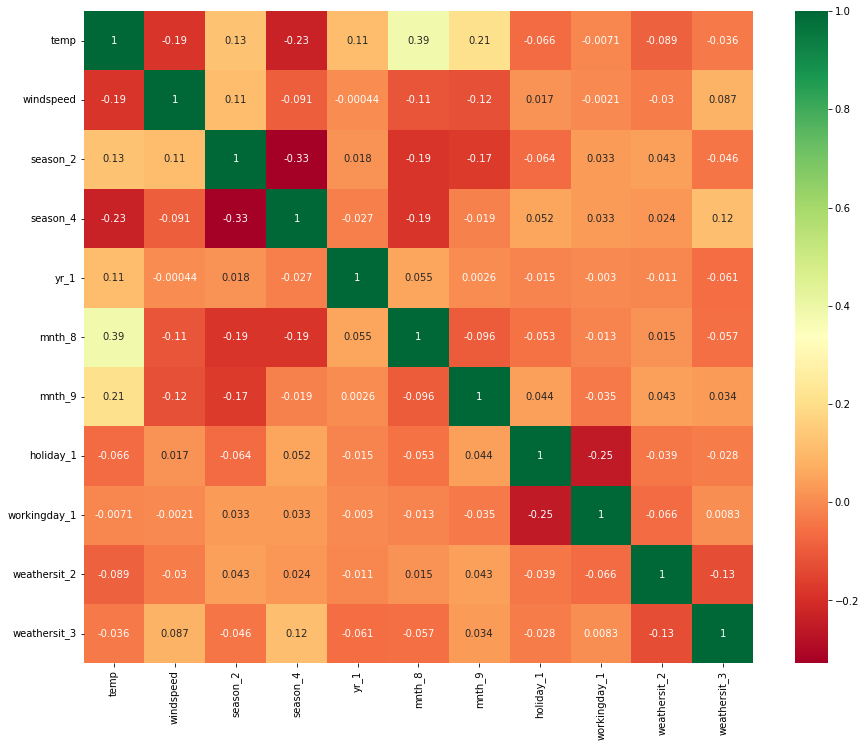

In [780]:
plt.figure(figsize = [15,12])
sns.heatmap(X_train.corr(),cmap = 'RdYlGn',annot = True)
plt.show()

In [781]:
X_train

,temp,windspeed,season_2,season_4,yr_1,mnth_8,mnth_9,holiday_1,workingday_1,weathersit_2,weathersit_3
576,29.246653,11.083475,0,0,1,0,0,0,1,0,0
426,16.980847,10.792293,0,0,1,0,0,0,0,1,0
728,10.489153,23.500518,0,0,1,0,0,0,1,0,0
482,15.443347,8.708325,1,0,1,0,0,0,0,1,0
111,13.803347,14.707907,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,30.852500,8.666718,0,0,1,1,0,0,1,0,0
53,9.091299,6.305571,0,0,0,0,0,0,1,0,0
350,10.591653,16.292189,0,1,0,0,0,0,1,1,0
79,17.647835,19.348461,1,0,0,0,0,0,1,1,0


In [782]:
y_train

576    7216
426    4066
728    1796
482    4220
111    1683
       ... 
578    7261
53     1917
350    2739
79     2077
520    7001
Name: cnt, Length: 510, dtype: int64

In [783]:
X_train_const

,const,temp,windspeed,season_2,season_4,yr_1,mnth_8,mnth_9,holiday_1,workingday_1,weathersit_2,weathersit_3
576,1.0,29.246653,11.083475,0,0,1,0,0,0,1,0,0
426,1.0,16.980847,10.792293,0,0,1,0,0,0,0,1,0
728,1.0,10.489153,23.500518,0,0,1,0,0,0,1,0,0
482,1.0,15.443347,8.708325,1,0,1,0,0,0,0,1,0
111,1.0,13.803347,14.707907,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,30.852500,8.666718,0,0,1,1,0,0,1,0,0
53,1.0,9.091299,6.305571,0,0,0,0,0,0,1,0,0
350,1.0,10.591653,16.292189,0,1,0,0,0,0,1,1,0
79,1.0,17.647835,19.348461,1,0,0,0,0,0,1,1,0


In [784]:
# predict the y_train of the trained model and name it as y_train_pred

y_train_pred = lr_model15.predict(X_train_const)
y_train_pred

576    6448.218603
426    4254.903386
728    3370.609062
482    5020.137858
111    2525.140768
          ...     
578    7238.989976
53     1878.213968
350    2148.290985
79     2667.811658
520    5527.553587
Length: 510, dtype: float64

<AxesSubplot:ylabel='Density'>

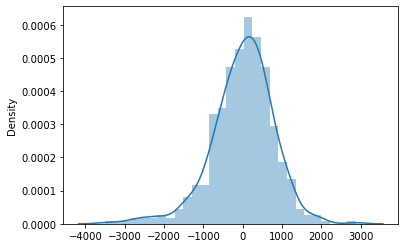

In [785]:
# now you have predicted values we do the residual analysis by plotting the histogram of error terms. 
#Distribution of error terms - 
        #---Here Error terms are centered around Zero
        #---distribution is normal

resid = y_train - y_train_pred
sns.distplot(resid)

In [786]:
r2_score(y_true = y_train,y_pred= y_train_pred)

0.8356218461114726

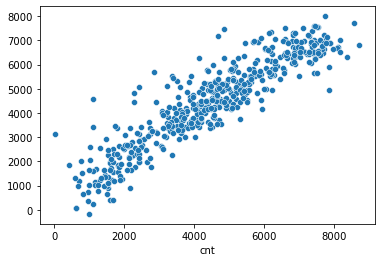

In [792]:
sns.scatterplot(y_train,y_train_pred)
plt.show()

In [536]:
y_test

184    6043
535    6211
299    2659
221    4780
152    4968
       ... 
702    6606
127    4333
640    7572
72     2046
653    7534
Name: cnt, Length: 220, dtype: int64

In [539]:
X_test.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'season_2',
       'season_3', 'season_4', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'holiday_1', 'weekday_1', 'workingday_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [540]:
dropped_columns = ['atemp','hum','casual','registered','season_3','mnth_2','mnth_3','mnth_4','mnth_5','mnth_6','mnth_7','mnth_10','mnth_11','mnth_12','weekday_1']

In [541]:
dropped_columns

['atemp',
 'hum',
 'casual',
 'registered',
 'season_3',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'weekday_1']

In [542]:
X_test.drop(dropped_columns,inplace = True,axis = 1)

In [543]:
X_test

,temp,windspeed,season_2,season_4,yr_1,mnth_8,mnth_9,holiday_1,workingday_1,weathersit_2,weathersit_3
184,29.793347,5.459106,0,0,0,0,0,1,0,1,0
535,32.082500,7.625404,1,0,1,0,0,0,1,0,0
299,19.270000,13.250121,0,1,0,0,0,0,0,1,0
221,31.433347,13.417286,0,0,0,1,0,0,1,0,0
152,29.315000,19.583229,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
702,19.509153,11.666643,0,1,1,0,0,0,1,0,0
127,21.661653,5.000712,1,0,0,0,0,0,1,0,0
640,26.957500,4.458569,0,1,1,0,0,0,1,1,0
72,13.333897,9.174042,0,0,0,0,0,0,1,0,0


In [544]:
X_test_const = sm.add_constant(X_test)

In [545]:
X_test_const

,const,temp,windspeed,season_2,season_4,yr_1,mnth_8,mnth_9,holiday_1,workingday_1,weathersit_2,weathersit_3
184,1.0,29.793347,5.459106,0,0,0,0,0,1,0,1,0
535,1.0,32.082500,7.625404,1,0,1,0,0,0,1,0,0
299,1.0,19.270000,13.250121,0,1,0,0,0,0,0,1,0
221,1.0,31.433347,13.417286,0,0,0,1,0,0,1,0,0
152,1.0,29.315000,19.583229,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,19.509153,11.666643,0,1,1,0,0,0,1,0,0
127,1.0,21.661653,5.000712,1,0,0,0,0,0,1,0,0
640,1.0,26.957500,4.458569,0,1,1,0,0,0,1,1,0
72,1.0,13.333897,9.174042,0,0,0,0,0,0,1,0,0


In [546]:
y_test

184    6043
535    6211
299    2659
221    4780
152    4968
       ... 
702    6606
127    4333
640    7572
72     2046
653    7534
Name: cnt, Length: 220, dtype: int64

In [547]:
# Predict y_test

y_test_pred = lr_model15.predict(X_test_const)

In [548]:
y_test_pred

184    3225.591475
535    7867.425009
299    3646.936505
221    5099.131216
152    5157.310109
          ...     
702    6298.664973
127    4535.215542
640    6895.791903
72     2337.004323
653    6234.058023
Length: 220, dtype: float64

In [549]:
from sklearn.metrics import r2_score

In [550]:
r2_score(y_true = y_test,y_pred= y_test_pred)

0.7965252017684902

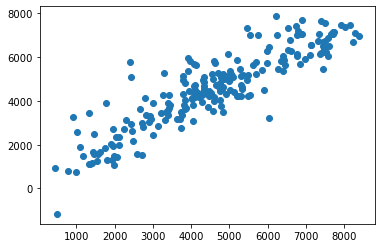

In [551]:
plt.scatter(y_test, y_test_pred)

In [552]:
error = y_test-y_test_pred

<AxesSubplot:ylabel='Density'>

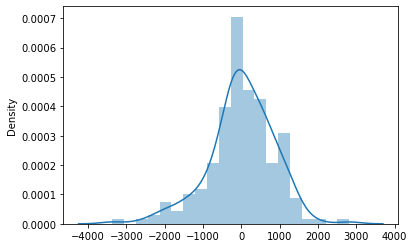

In [555]:
sns.distplot(error)

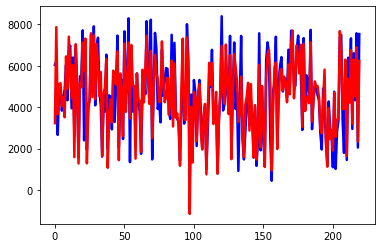

In [659]:
c = [i for i in range(0,220,1)]

plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red", linewidth=2.5, linestyle="-")